# **Multiple Linear Regression**

### Importing All Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

### Data Framing

In [2]:
# Load and preprocess data
df = pd.read_csv('Life_expectancy_dataset.csv', encoding='ISO-8859-1')
df.head()

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,Macau; China,84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe


In [3]:
# Check data shape
df.shape

(223, 6)

In [4]:
# Check null values
df.isnull().sum()

Rank            0
Country         0
Overall Life    0
Male Life       0
Female Life     0
Continent       0
dtype: int64

In [5]:
df.describe()

,Rank,Overall Life,Male Life,Female Life
count,223.000000,223.000000,223.000000,223.000000
mean,112.000000,72.487892,70.041704,75.019283
std,64.518731,8.459335,8.074942,8.986633
min,1.000000,50.200000,48.600000,51.000000
25%,56.500000,67.450000,64.500000,69.750000
50%,112.000000,74.900000,72.200000,77.900000
75%,167.500000,78.600000,75.850000,81.600000
max,223.000000,89.500000,85.600000,93.500000


### **Preprocessing**

One-hot encode the 'Continent' column

In [6]:
encoder = OneHotEncoder(drop='first')
continent_encoded = encoder.fit_transform(df[['Continent']]).toarray()
continent_df = pd.DataFrame(continent_encoded, columns=encoder.get_feature_names_out(['Continent']))

In [7]:
# Combine the new one-hot encoded columns with the original DataFrame
df = pd.concat([df, continent_df], axis=1)
df.head()

,Rank,Country,Overall Life,Male Life,Female Life,Continent,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,1,Monaco,89.5,85.6,93.5,Europe,0.0,1.0,0.0,0.0,0.0
1,2,Japan,85.0,81.7,88.5,Asia,1.0,0.0,0.0,0.0,0.0
2,3,Singapore,85.0,82.3,87.8,Asia,1.0,0.0,0.0,0.0,0.0
3,4,Macau; China,84.5,81.6,87.6,Asia,1.0,0.0,0.0,0.0,0.0
4,5,San Marino,83.3,80.7,86.1,Europe,0.0,1.0,0.0,0.0,0.0


### **Defining independent (X) and dependent (y) variables**

In [8]:
X = df[['Rank', 'Male Life', 'Female Life'] + list(continent_df.columns)]
y = df['Overall Life'] 

### **Splitting Dataset**

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Training the Model**
using Linear regression model to train on x and y

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### **Prediction**

Predicting the overall life expectancy by giving an multiple inputs (Male Life,Female Life,continent_df)

In [11]:
y_pred = model.predict(X_test)
#Comparison
print('- y_pred : ')
print(y_pred)
print('- y_test : ')
print(y_test)

- y_pred : 
[82.5711515  76.54838634 74.74198624 72.29515876 51.33503554 74.83591206
 77.58732833 75.29890067 64.89614879 63.75722557 78.58807235 82.0907919
 60.05566471 81.33362789 80.86238867 79.42644561 66.53439097 76.75611423
 55.76695005 75.59108782 75.8565679  82.07683754 76.76322871 72.54937826
 71.85629867 72.33666754 60.55395924 77.57167631 78.14922153 75.45864373
 54.51568161 77.43633904 81.84120905 62.97551938 70.07528584 74.6647657
 69.22035476 74.89157963 77.09401256 64.26726439 68.53542419 57.31828686
 64.07754874 74.46069808 67.75831665]
- y_test : 
9      82.5
84     76.5
117    74.6
144    72.3
220    51.3
113    74.8
68     77.6
104    75.3
177    64.9
185    63.8
55     78.6
15     82.1
198    60.1
25     81.3
30     80.9
45     79.4
171    66.5
82     76.7
207    55.8
97     75.6
93     75.8
18     81.9
79     76.8
141    72.5
147    71.8
143    72.4
196    60.6
67     77.6
60     78.1
101    75.5
211    54.5
69     77.5
16     81.9
189    63.0
156    70.1
114    74

In [12]:
# Calculate mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Print the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 0.3879294177581599
R^2 Score: 0.9938687386382028
Coefficients: [-4.99096518e-04  5.09753418e-01  4.84839266e-01  3.77837487e-02
  2.17438046e-02  3.99938321e-02  6.63220502e-02  7.58449196e-02]
Intercept: 0.4198272460539272


### Plotting the regression line for necessary columns

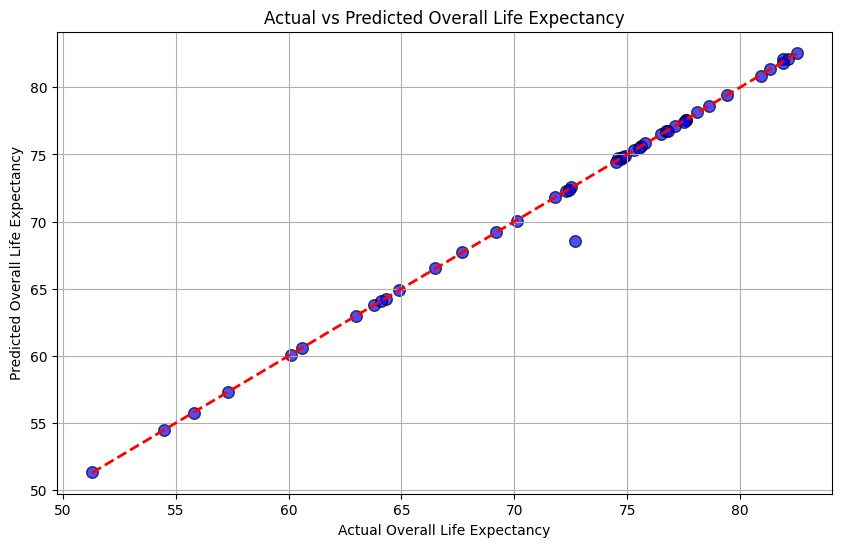

In [13]:
# Plotting function for regression results
def plot_regression_results(y_test, y_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, s=70)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Overall Life Expectancy')
    plt.ylabel('Predicted Overall Life Expectancy')
    plt.title('Actual vs Predicted Overall Life Expectancy')
    plt.grid(True)
    plt.show()

# Call the plotting function
plot_regression_results(y_test, y_pred)